In [496]:
# adding libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy import stats
import pycountry
import geopandas

In [497]:
# Loading the dataset
data = "/Users/neelima/Desktop/AIT 614 FINAL PROJECT/ait 614 dataset_final project.csv"
df=pd.read_csv('/Users/neelima/Desktop/AIT 614 FINAL PROJECT/ait 614 dataset_final project.csv', index_col=0)

In [498]:
df

,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
country,,,,,,,,,,,
Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [499]:
df.reset_index(inplace=True)

In [500]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [501]:
#renaming the columns
df.rename(columns={"suicides/100k pop": "suicides_pop", "HDI for year": "HDI_for_year",
                   " gdp_for_year ($) ": "gdp_for_year", " gdp_per_capita ($) ": "gdp_per_capita",
                   "gdp_per_capita ($)": "gdp_per_capita"}, inplace=True)


In [502]:
# Data cleaning and preprocessing
df["gdp_for_year"] = df["gdp_for_year"].str.replace(",", "").astype(np.int64)
df["age"] = df["age"].str.replace("5-14 years", "05-14 years")


/Users/neelima/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/neelima/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


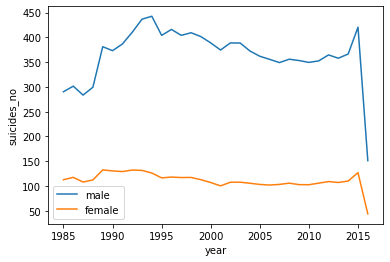

In [503]:
# Visualize suicide numbers for men and women over the years
df_men = df[df.sex == "male"]
df_women = df[df.sex == "female"]
sns.lineplot(df_men.year, df.suicides_no, ci=None)
sns.lineplot(df_women.year, df.suicides_no, ci=None)
plt.legend(["male", 'female'])
plt.show()


/var/folders/pq/pys1qwkd06xd_llc2pg2_j8h0000gn/T/ipykernel_21442/1404433354.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_age = df.groupby(["year", "age"])["suicides_no", "population"].sum()
/Users/neelima/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


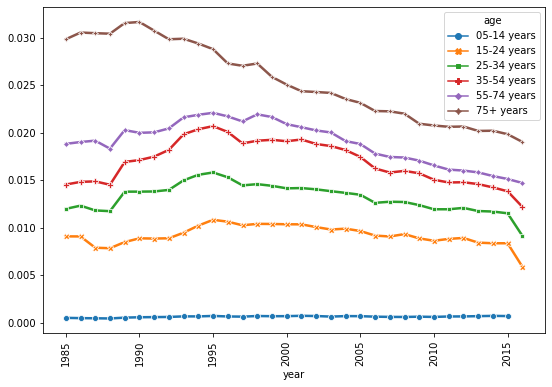

In [437]:
# Visualize suicide rate by age group over the years
df_age = df.groupby(["year", "age"])["suicides_no", "population"].sum()
df_reset = df_age.copy().reset_index()
plt.figure(figsize=(9, 6))
sns.lineplot("year", df_reset.suicides_no * 100 / df_reset.population, hue="age",
             data=df_reset, linewidth=2.5, style="age", markers=True, dashes=False)
plt.xticks(rotation=90)
plt.show()

/var/folders/pq/pys1qwkd06xd_llc2pg2_j8h0000gn/T/ipykernel_21442/4222669556.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_generation = df.groupby(["year", "generation"])["suicides_no", "population"].sum()
/Users/neelima/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


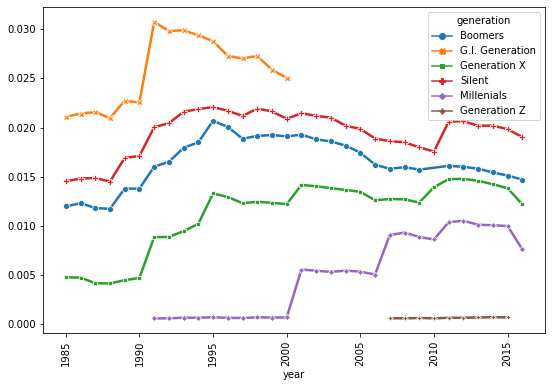

In [438]:
# Visualize suicide rate by generation over the years
df_generation = df.groupby(["year", "generation"])["suicides_no", "population"].sum()
df_generation_reset = df_generation.copy().reset_index()
plt.figure(figsize=(9, 6))
sns.lineplot("year", df_generation_reset.suicides_no * 100 / df_generation_reset.population, hue="generation",
             data=df_generation_reset, linewidth=2.5, style="generation", markers=True, dashes=False)
plt.xticks(rotation=90)
plt.show()


In [439]:
# Handle country name discrepancies
df.replace("Republic of Korea", "Korea, Republic of", inplace=True)
df.replace('Czech Republic', "Czechia", inplace=True)
df.replace('Macau', 'Macao', inplace=True)
df.replace('Saint Vincent and Grenadines', "Saint Vincent and the Grenadines", inplace=True)


In [440]:
# Calculate and visualize suicide rate for each country
df_suino = df.groupby(["country", "year"])["suicides_no"].sum()
df_sum = df_suino.sort_index(ascending=True)[:] * 100
df_pop = df.groupby(["country", "year"]).population.sum()
df_pop_sum = df_pop.sort_index(ascending=False)[:]
df_total = df_sum / df_pop_sum


In [441]:
# Calculate the average suicide rate for each country
country_dict = {}
for country in df_total.index.get_level_values(0):
    if country not in country_dict.keys():
        country_dict[country] = df_total[country].mean()


In [442]:
# Sort countries based on suicide rate
tup = list(country_dict.items())
tup.sort(key=lambda pair: pair[1], reverse=True)
country_list = [a[0] for a in tup]
country_suicide = [a[1] for a in tup]


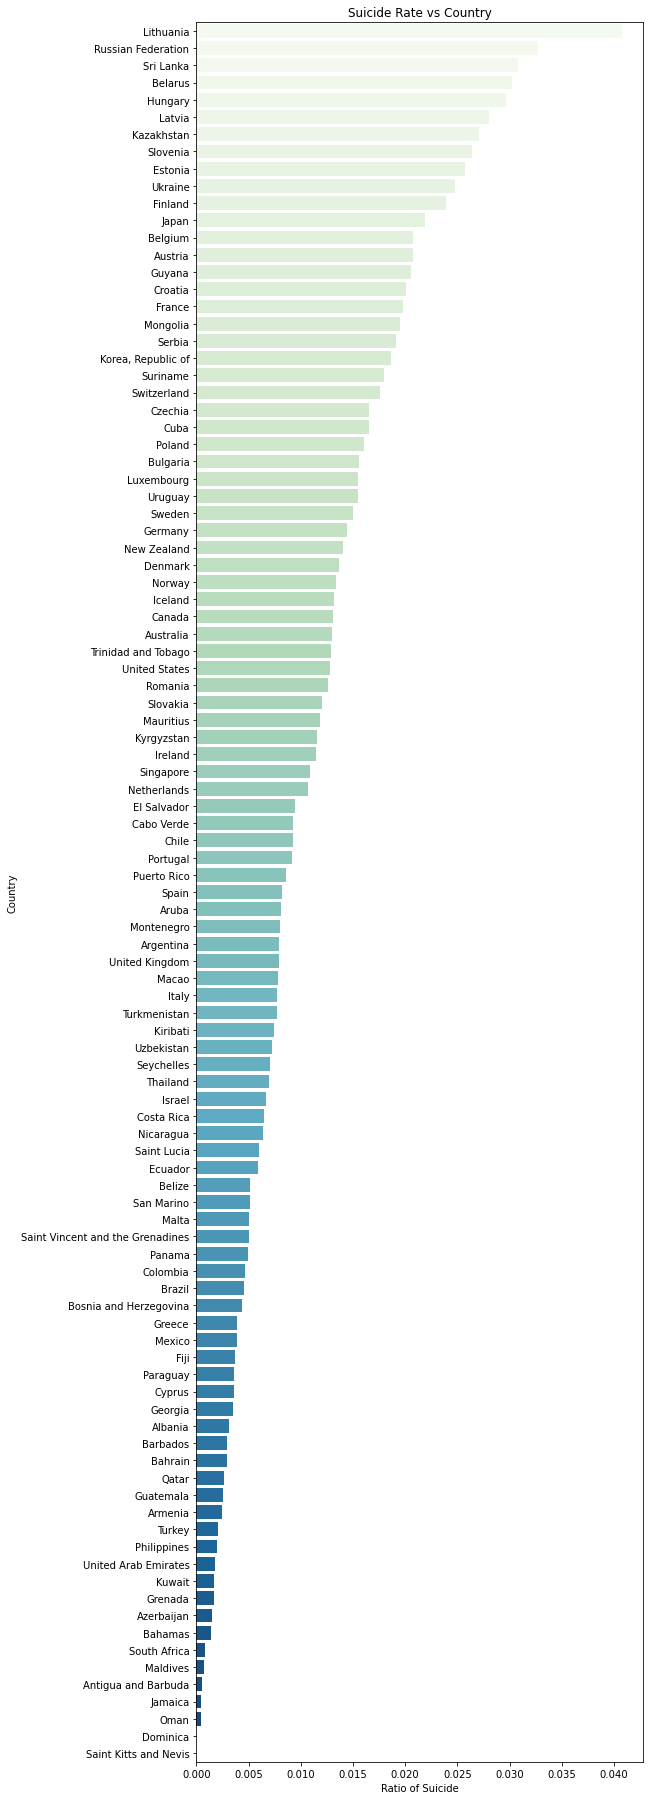

In [443]:
# Plot the top 20 countries with the highest suicide rates
plt.figure(figsize=(8, 32))
sns.barplot(x=country_suicide[:], y=country_list[:], palette="GnBu")
plt.xlabel("Ratio of Suicide")
plt.ylabel("Country")
plt.title("Suicide Rate vs Country")
plt.show()


In [444]:
# Merge with geopandas data for world map visualization
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

country_dict = dict()
for idx in range(len(country_list)):
    country_dict[countries[country_list[idx]]] = country_suicide[idx]

new_country_dict = {}
new_country_dict["iso_a3"] = list(country_dict.keys())
new_country_dict["suicide_rate"] = list(country_dict.values())
new_country_df = pd.DataFrame(new_country_dict)

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
result = pd.merge(world, new_country_df, on="iso_a3")


/var/folders/pq/pys1qwkd06xd_llc2pg2_j8h0000gn/T/ipykernel_21442/2661099444.py:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


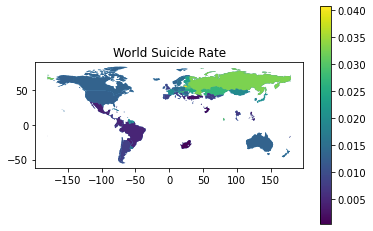

In [445]:
# Visualize the suicide rate on a world map
ax = result.plot()
ax.set_title("World Suicide Rate")
result.plot(column='suicide_rate', ax=ax, legend=True)
plt.show()

In [446]:
df

,country,year,sex,age,suicides_no,population,suicides_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,63067077179,2309,Silent
27817,Uzbekistan,2014,male,05-14 years,60,2762158,2.17,Uzbekistan2014,0.675,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,05-14 years,44,2631600,1.67,Uzbekistan2014,0.675,63067077179,2309,Generation Z


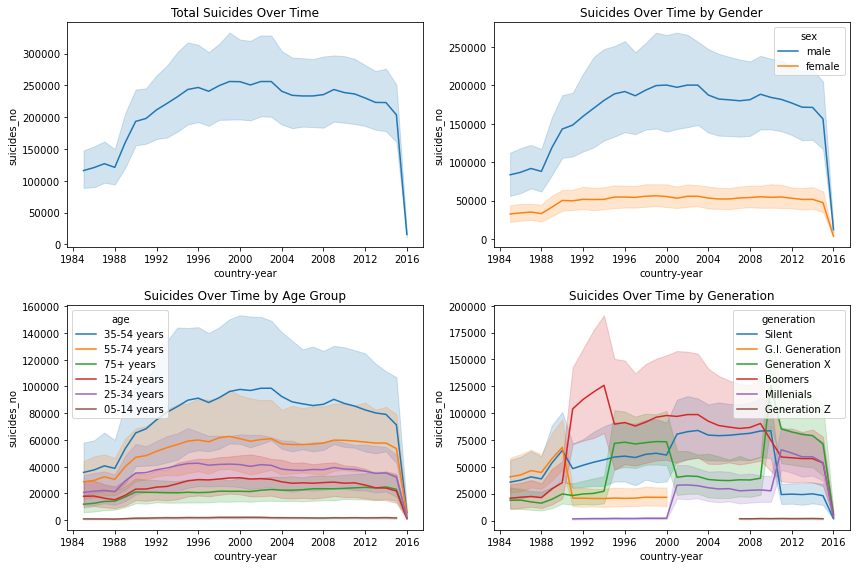

In [447]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Convert 'year' to datetime format
df['country-year'] = pd.to_datetime(df['country-year'].str.extract(r'(\d{4})')[0], format='%Y')

# Sort the data by year
df = df.sort_values(by='country-year')

# Explore the time series data
plt.figure(figsize=(12, 8))

# Plot the overall suicides trend over the years
plt.subplot(2, 2, 1)
sns.lineplot(x='country-year', y='suicides_no', data=df, estimator='sum')
plt.title('Total Suicides Over Time')

# Plot the suicides trend by gender
plt.subplot(2, 2, 2)
sns.lineplot(x='country-year', y='suicides_no', hue='sex', data=df, estimator='sum')
plt.title('Suicides Over Time by Gender')

# Plot the suicides trend by age group
plt.subplot(2, 2, 3)
sns.lineplot(x='country-year', y='suicides_no', hue='age', data=df, estimator='sum')
plt.title('Suicides Over Time by Age Group')

# Plot the suicides trend by generation
plt.subplot(2, 2, 4)
sns.lineplot(x='country-year', y='suicides_no', hue='generation', data=df, estimator='sum')
plt.title('Suicides Over Time by Generation')

plt.tight_layout()
plt.show()


In [448]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [449]:
target_column = 'sex'

# x is the df separatimng our target variable.
df_new = df.drop(columns=[target_column])

# our target variable.
y = df[target_column]

In [450]:
X = df_new.drop(columns=['country-year','HDI_for_year'])

In [451]:
X

,country,year,age,suicides_no,population,suicides_pop,gdp_for_year,gdp_per_capita,generation
21632,Saint Vincent and the Grenadines,1985,35-54 years,2,6100,32.79,145641704,1622,Silent
21637,Saint Vincent and the Grenadines,1985,55-74 years,0,4100,0.00,145641704,1622,G.I. Generation
21638,Saint Vincent and the Grenadines,1985,75+ years,0,1000,0.00,145641704,1622,G.I. Generation
21639,Saint Vincent and the Grenadines,1985,15-24 years,0,12100,0.00,145641704,1622,Generation X
21640,Saint Vincent and the Grenadines,1985,25-34 years,0,9300,0.00,145641704,1622,Boomers
...,...,...,...,...,...,...,...,...,...
6622,Croatia,2016,35-54 years,146,571003,25.57,51338524831,12905,Generation X
17447,Netherlands,2016,15-24 years,35,1025443,3.41,777227541581,48108,Millenials
17446,Netherlands,2016,25-34 years,65,1043372,6.23,777227541581,48108,Millenials
7415,Czechia,2016,75+ years,25,480884,5.20,195305084919,19505,Silent


In [452]:
list(X.columns)

['country',
 'year',
 'age',
 'suicides_no',
 'population',
 'suicides_pop',
 'gdp_for_year',
 'gdp_per_capita',
 'generation']

In [453]:
# and you want to select columns 'column1', 'column2', and 'column3'
selected_columns = ['country', 'generation']

# Create a new DataFrame with only the selected columns
df_text = X[selected_columns].copy()


In [454]:
df_text

,country,generation
21632,Saint Vincent and the Grenadines,Silent
21637,Saint Vincent and the Grenadines,G.I. Generation
21638,Saint Vincent and the Grenadines,G.I. Generation
21639,Saint Vincent and the Grenadines,Generation X
21640,Saint Vincent and the Grenadines,Boomers
...,...,...
6622,Croatia,Generation X
17447,Netherlands,Millenials
17446,Netherlands,Millenials
7415,Czechia,Silent


In [455]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame with two columns 'column1' and 'column2'
df_text['country'] = LabelEncoder().fit_transform(df_text['country'])
df_text['generation'] = LabelEncoder().fit_transform(df_text['generation'])

In [456]:
df_text

,country,generation
21632,78,5
21637,78,1
21638,78,1
21639,78,2
21640,78,0
...,...,...
6622,22,2
17447,62,4
17446,62,4
7415,25,5


In [457]:
X = X.drop(columns=['country','generation'])

In [458]:
X

,year,age,suicides_no,population,suicides_pop,gdp_for_year,gdp_per_capita
21632,1985,35-54 years,2,6100,32.79,145641704,1622
21637,1985,55-74 years,0,4100,0.00,145641704,1622
21638,1985,75+ years,0,1000,0.00,145641704,1622
21639,1985,15-24 years,0,12100,0.00,145641704,1622
21640,1985,25-34 years,0,9300,0.00,145641704,1622
...,...,...,...,...,...,...,...
6622,2016,35-54 years,146,571003,25.57,51338524831,12905
17447,2016,15-24 years,35,1025443,3.41,777227541581,48108
17446,2016,25-34 years,65,1043372,6.23,777227541581,48108
7415,2016,75+ years,25,480884,5.20,195305084919,19505


In [459]:
Z = pd.concat([X,df_text],axis=1)

In [460]:
Z.reset_index(drop=True)

,year,age,suicides_no,population,suicides_pop,gdp_for_year,gdp_per_capita,country,generation
0,1985,35-54 years,2,6100,32.79,145641704,1622,78,5
1,1985,55-74 years,0,4100,0.00,145641704,1622,78,1
2,1985,75+ years,0,1000,0.00,145641704,1622,78,1
3,1985,15-24 years,0,12100,0.00,145641704,1622,78,2
4,1985,25-34 years,0,9300,0.00,145641704,1622,78,0
...,...,...,...,...,...,...,...,...,...
27815,2016,35-54 years,146,571003,25.57,51338524831,12905,22,2
27816,2016,15-24 years,35,1025443,3.41,777227541581,48108,62,4
27817,2016,25-34 years,65,1043372,6.23,777227541581,48108,62,4
27818,2016,75+ years,25,480884,5.20,195305084919,19505,25,5


In [461]:
print(Z.index)

Int64Index([21632, 21637, 21638, 21639, 21640, 21641, 21642, 21643, 22184,
            22185,
            ...
             6627,  6626,  6625,  6624,  6623,  6622, 17447, 17446,  7415,
            20927],
           dtype='int64', length=27820)


In [462]:
Z['age'].unique()

array(['35-54 years', '55-74 years', '75+ years', '15-24 years',
       '25-34 years', '05-14 years'], dtype=object)

In [463]:
Z['age'] = Z['age'].replace('15-24 years', 2)

In [464]:
Z['age'].unique()

array(['35-54 years', '55-74 years', '75+ years', 2, '25-34 years',
       '05-14 years'], dtype=object)

In [465]:
Z['age'] = Z['age'].replace('35-54 years', 4)

In [466]:
Z['age'] = Z['age'].replace('75+ years', 6)
Z['age'] = Z['age'].replace('25-34 years', 3)
Z['age'] = Z['age'].replace('55-74 years', 5)
Z['age'] = Z['age'].replace('05-14 years', 1)

In [467]:
print(Z.columns)

Index(['year', 'age', 'suicides_no', 'population', 'suicides_pop',
       'gdp_for_year', 'gdp_per_capita', 'country', 'generation'],
      dtype='object')


In [468]:
#Z['gdp_for_year'] = Z[' gdp_for_year ($) '].replace(',', '')

In [469]:
Z['gdp_for_year'] = Z['gdp_for_year'].replace(',', '')

In [470]:
#Z=Z.drop(columns=['gdp_for_year'])

In [471]:
Z

,year,age,suicides_no,population,suicides_pop,gdp_for_year,gdp_per_capita,country,generation
21632,1985,4,2,6100,32.79,145641704,1622,78,5
21637,1985,5,0,4100,0.00,145641704,1622,78,1
21638,1985,6,0,1000,0.00,145641704,1622,78,1
21639,1985,2,0,12100,0.00,145641704,1622,78,2
21640,1985,3,0,9300,0.00,145641704,1622,78,0
...,...,...,...,...,...,...,...,...,...
6622,2016,4,146,571003,25.57,51338524831,12905,22,2
17447,2016,2,35,1025443,3.41,777227541581,48108,62,4
17446,2016,3,65,1043372,6.23,777227541581,48108,62,4
7415,2016,6,25,480884,5.20,195305084919,19505,25,5


In [472]:
y = LabelEncoder().fit_transform(y)

In [473]:
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=42)

In [474]:
from sklearn.preprocessing import MinMaxScaler

#Assuming 'df' is your DataFrame
#columns_to_normalize = Z.columns  # You can also specify specific columns if needed

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [475]:
# Linear Regression Model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)


LinearRegression()

In [476]:
# Make predictions on the test set
linear_reg_predictions_train = linear_reg_model.predict(X_train)
linear_reg_predictions_train = (linear_reg_predictions_train >= 0.5).astype(int)

In [477]:
linear_reg_predictions_test = linear_reg_model.predict(X_test)

In [478]:
# Convert probabilities to binary predictions (0 or 1)
linear_reg_predictions_test_lab = (linear_reg_predictions_test >= 0.5).astype(int)

In [479]:
linear_reg_predictions_test_lab

array([0, 1, 0, ..., 0, 1, 0])

In [480]:
X_train.shape

(22256, 9)

In [481]:
y_train.shape

(22256,)

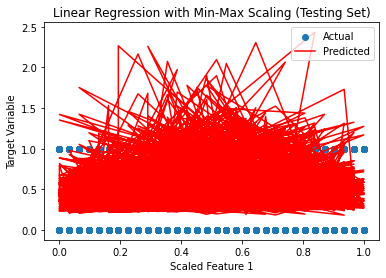

In [483]:
plt.scatter(X_test[:, 0], y_test, label='Actual')
plt.plot(X_test[:, 0], linear_reg_predictions_test, color='red', label='Predicted')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Target Variable')
plt.title('Linear Regression with Min-Max Scaling (Testing Set)')
plt.legend()
plt.show()

In [484]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, linear_reg_predictions_test_lab))

              precision    recall  f1-score   support

           0       0.67      0.87      0.76      2835
           1       0.80      0.56      0.66      2729

    accuracy                           0.72      5564
   macro avg       0.74      0.71      0.71      5564
weighted avg       0.74      0.72      0.71      5564



In [485]:
# Calculate the Mean Squared Error for Linear Regression
mse_linear_reg = mean_squared_error(y_test, linear_reg_predictions_test)
print(f"Linear Regression Mean Squared Error: {mse_linear_reg}")


Linear Regression Mean Squared Error: 0.20419969901918988


In [486]:
# Decision Tree Model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [487]:
# Make predictions on the test set
decision_tree_predictions = decision_tree_model.predict(X_test)


In [488]:
decision_tree_predictions=decision_tree_predictions.astype(int)

In [489]:
y_test

array([1, 1, 0, ..., 0, 1, 1])

In [490]:
# Calculate the Mean Squared Error for Decision Tree
mse_decision_tree = mean_squared_error(y_test, decision_tree_predictions)
print(f"Decision Tree Mean Squared Error: {mse_decision_tree}")


Decision Tree Mean Squared Error: 0.16552839683680806


In [491]:
print(classification_report(y_test, decision_tree_predictions))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2835
           1       0.83      0.83      0.83      2729

    accuracy                           0.83      5564
   macro avg       0.83      0.83      0.83      5564
weighted avg       0.83      0.83      0.83      5564



In [492]:
decision_tree_predictions

array([1, 1, 0, ..., 0, 1, 1])

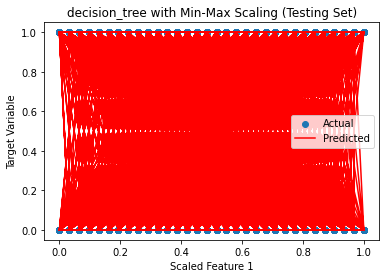

In [493]:
plt.scatter(X_test[:, 0], y_test, label='Actual')
plt.plot(X_test[:, 0], decision_tree_predictions, color='red', label='Predicted')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Target Variable')
plt.title('decision_tree with Min-Max Scaling (Testing Set)')
plt.legend()
plt.show()

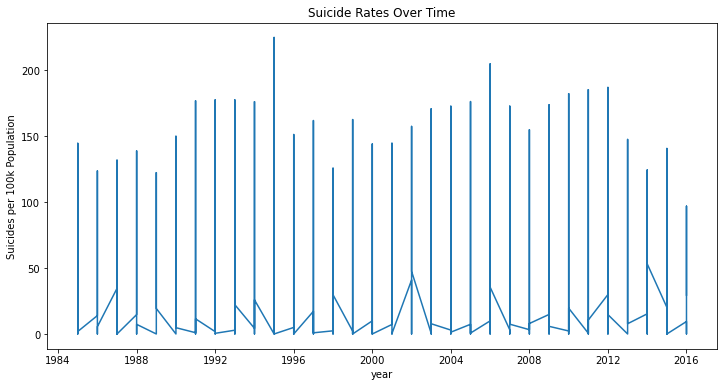

ADF Statistic: -43.54153328439275
p-value: 0.0
Critical Values: {'1%': -3.4305851806581544, '5%': -2.8616439431929708, '10%': -2.5668253258419913}


KeyboardInterrupt: 

In [494]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


df['year'] = pd.to_datetime(df['year'], format='%Y')
df.set_index('year', inplace=True)

# Visualize the time series
plt.figure(figsize=(12, 6))
plt.plot(df['suicides_pop'])
plt.title('Suicide Rates Over Time')
plt.xlabel('year')
plt.ylabel('Suicides per 100k Population')
plt.show()

# Check stationarity using Augmented Dickey-Fuller test
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

test_stationarity(df['suicides_pop'])

# If the p-value is greater than 0.05, the series is likely not stationary.
# We need to difference the series to make it stationary.

# Differencing to make the series stationary
df['suicides_diff'] = df['suicides_pop'].diff().dropna()

# Visualize the differenced time series
plt.figure(figsize=(12, 6))
plt.plot(df['suicides_diff'])
plt.title('Differenced Time Series')
plt.xlabel('year')
plt.ylabel('Differenced Suicides per 100k Population')
plt.show()

# Test stationarity again
test_stationarity(df['suicides_diff'])

# Fit ARIMA model
model = ARIMA(df['suicides_pop'], order=(1,1,1))  # Adjust order as needed
results = model.fit()

# Forecast future values
forecast_steps = 12  # Adjust as needed
forecast = results.get_forecast(steps=forecast_steps)

# Visualize the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['suicides_pop'], label='Observed')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast.index, forecast.conf_int()[:, 0], forecast.conf_int()[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA Forecasting')
plt.xlabel('year')
plt.ylabel('Suicides per 100k Population')
plt.legend()
plt.show()


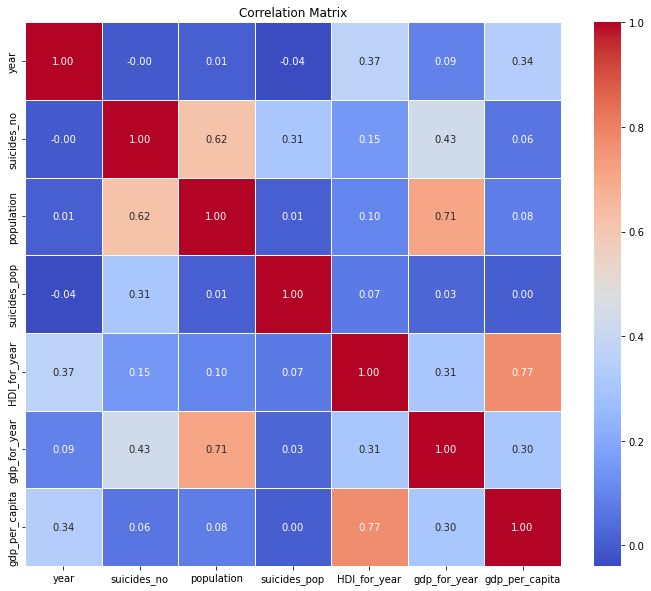

In [504]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()